In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import PIL
import subprocess
import os
import cv2
import sys
import csv
import zipfile
import random
import shutil
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow import keras
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers.experimental import SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3

Unzipping the dataset

In [3]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CS550Asss2/validation.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/MLAsg2")
zip_ref.close()

In [4]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CS550Asss2/test.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/MLAsg2/Test")
zip_ref.close()

In [5]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CS550Asss2/train.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/MLAsg2")
zip_ref.close()

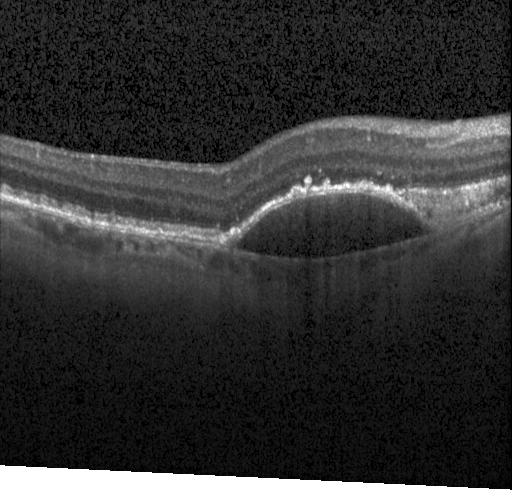

In [6]:
PIL.Image.open('/content/drive/MyDrive/MLAsg2/train/CNV/CNV-103044-168.jpeg')

In [7]:
img1 = cv2.imread('/content/drive/MyDrive/MLAsg2/train/CNV/CNV-1016042-111.jpeg')
# img1=img1.flatten()
img1.shape

(496, 1536, 3)

In [8]:
img1

array([[[ 2,  2,  2],
        [ 0,  0,  0],
        [ 6,  6,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [13, 13, 13],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 7,  7,  7],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[10, 10, 10],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[14, 14, 14],
        [ 4,  4,  4],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1]]], dtype=uint8)

In [9]:
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CS550Asss2/test.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/MLAsg2/Test")
# zip_ref.close()

Since image size are different New image size is defined (64,64)

In [10]:
train = IDG(rescale=1./255, shear_range = 0.2, zoom_range = 0.2,)
validation = IDG(rescale=1./255)
test = IDG(rescale=1./255)

In [11]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/MLAsg2/train', target_size=(64, 64), batch_size = 32, class_mode='sparse')

Found 20000 images belonging to 4 classes.


In [12]:
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/MLAsg2/validation', target_size=(64, 64), batch_size = 32, class_mode='sparse')

Found 4000 images belonging to 4 classes.


In [13]:
test_dataset = test.flow_from_directory('/content/drive/MyDrive/MLAsg2/Test', target_size=(64, 64), batch_size = 32, class_mode=None, shuffle=False)

Found 10000 images belonging to 1 classes.


In [14]:
validation_dataset.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

## Basic Model

In [ ]:
#random architecture
benchmark_model = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 256 x 256 with 3 color channels will be input into this layer
benchmark_model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(64,64,3)))
benchmark_model.add(MaxPooling2D(pool_size=2, strides=2))
benchmark_model.add(Conv2D(32, kernel_size=3, activation='relu'))
benchmark_model.add(MaxPooling2D(pool_size=2, strides=2))
benchmark_model.add(Flatten())
benchmark_model.add(Dense(128,activation='relu'))
benchmark_model.add(Dense(4,activation='softmax'))
benchmark_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
benchmark_model.summary()

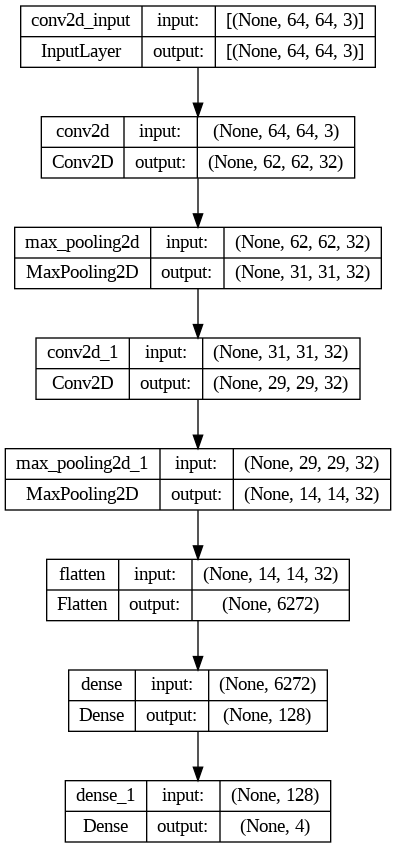

In [ ]:
plot_model(benchmark_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_fit = benchmark_model.fit(train_dataset,epochs= 10,batch_size=64, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 155s 231ms/step - loss: 1.1255 - acc: 0.4931 - val_loss: 1.0606 - val_acc: 0.5575
Epoch 2/10
625/625 [==============================] - 139s 223ms/step - loss: 0.8866 - acc: 0.6345 - val_loss: 0.9171 - val_acc: 0.6332
Epoch 3/10
625/625 [==============================] - 132s 211ms/step - loss: 0.8025 - acc: 0.6736 - val_loss: 0.8040 - val_acc: 0.6852
Epoch 4/10
625/625 [==============================] - 134s 214ms/step - loss: 0.7606 - acc: 0.6969 - val_loss: 0.7700 - val_acc: 0.6965
Epoch 5/10
625/625 [==============================] - 131s 210ms/step - loss: 0.7101 - acc: 0.7140 - val_loss: 0.7994 - val_acc: 0.6885
Epoch 6/10
625/625 [==============================] - 132s 212ms/step - loss: 0.6816 - acc: 0.7301 - val_loss: 0.6972 - val_acc: 0.7272
Epoch 7/10
625/625 [==============================] - 130s 207ms/step - loss: 0.6485 - acc: 0.7428 - val_loss: 0.7427 - val_acc: 0.7222
Epoch 8/10
625/625 [============================

<Axes: >

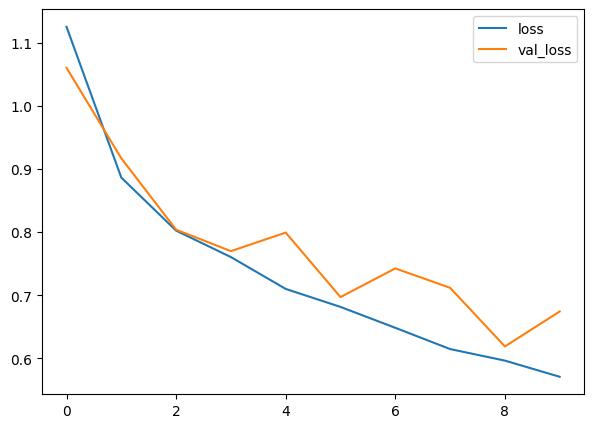

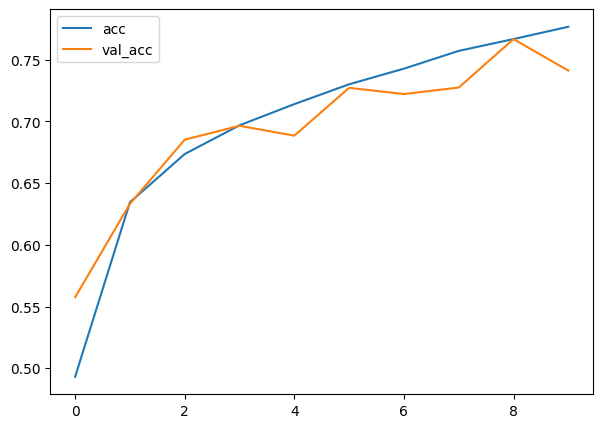

In [ ]:
loss_val = pd.DataFrame(model_fit.history)
loss_val[['loss', 'val_loss']].plot(figsize=(14/2, 5))
loss_val[['acc', 'val_acc']].plot(figsize=(14/2, 5))

## ResNet50

In [15]:
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3), classes=4)

for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.01,momentum=0.7)
resnet50_x = Flatten()(ResNet50_model.output)
resnet50_x = Dense(128,activation='relu')(resnet50_x)
resnet50_x = Dense(4,activation='softmax')(resnet50_x)
resnet50_x_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_x)
resnet50_x_final_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = 10
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
resnet50_history = resnet50_x_final_model.fit(train_dataset, epochs = number_of_epochs ,validation_data = validation_dataset,callbacks=callbacklist,verbose=1)

94765736/94765736 [==============================] - 5s 0us/step


Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.8577 - acc: 0.6528
Epoch 1: val_acc improved from -inf to 0.42100, saving model to resnet50-saved-model-01-val_acc-0.42.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 188s 257ms/step - loss: 0.8577 - acc: 0.6528 - val_loss: 1.2846 - val_acc: 0.4210 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5577 - acc: 0.7882
Epoch 2: val_acc improved from 0.42100 to 0.77225, saving model to resnet50-saved-model-02-val_acc-0.77.hdf5
625/625 [==============================] - 146s 234ms/step - loss: 0.5577 - acc: 0.7882 - val_loss: 0.5883 - val_acc: 0.7722 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4746 - acc: 0.8200
Epoch 3: val_acc did not improve from 0.77225
625/625 [==============================] - 135s 216ms/step - loss: 0.4746 - acc: 0.8200 - val_loss: 0.5926 - val_acc: 0.7650 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.4217 - acc: 0.8392
Epoch 4: val_acc improved from 0.77225 to 0.80925, saving model to resnet50-saved-model-04-val_acc-0.81.hdf5
625/625 [==============================] - 132s 2

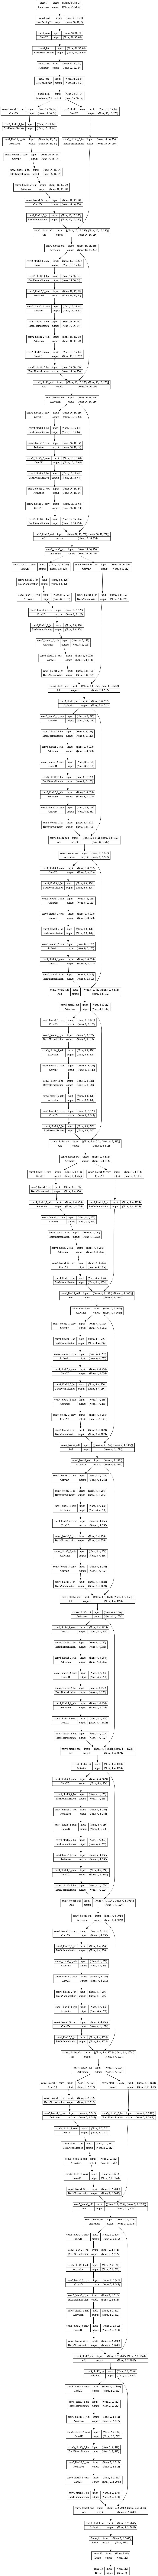

In [34]:
plot_model(resnet50_x_final_model, to_file='model.png', show_shapes=True, show_layer_names=True)

<Axes: >

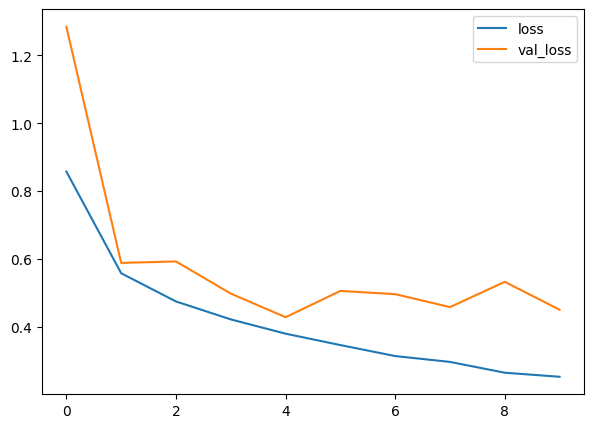

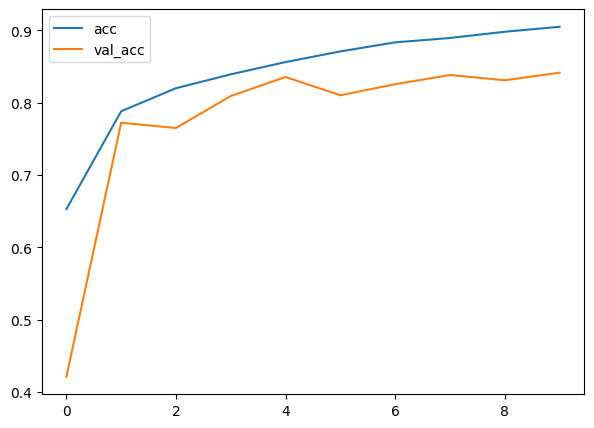

In [16]:
loss_val_resnet50 = pd.DataFrame(resnet50_history.history)
loss_val_resnet50[['loss', 'val_loss']].plot(figsize=(14/2, 5))
loss_val_resnet50[['acc', 'val_acc']].plot(figsize=(14/2, 5))

## VGG16

In [ ]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(64,64,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(512, activation = 'relu')(vgg_x)
vgg_x = Dense(4, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

# VGG16
number_of_epochs = 10
vgg16_filepath = 'vgg_16_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
vgg_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
vgg_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
vgg16_history = vgg16_final_model.fit(train_dataset, epochs = number_of_epochs ,validation_data = validation_dataset,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 1.1409 - acc: 0.4884
Epoch 1: val_acc improved from -inf to 0.52675, saving model to vgg_16_-saved-model-01-acc-0.53.hdf5
625/625 [==============================] - 134s 211ms/step - loss: 1.1409 - acc: 0.4884 - val_loss: 1.0706 - val_acc: 0.5268
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - ETA: 0s - loss: 1.0366 - acc: 0.5511
Epoch 2: val_acc improved from 0.52675 to 0.55850, saving model to vgg_16_-saved-model-02-acc-0.56.hdf5
625/625 [==============================] - 138s 221ms/step - loss: 1.0366 - acc: 0.5511 - val_loss: 1.0143 - val_acc: 0.5585
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 1.0041 - acc: 0.5654
Epoch 3: val_acc did not improve from 0.55850
625/625 [==============================] - 137s 218ms/step - loss: 1.0041 - acc: 0.5654 - val_loss: 0.9929 - val_acc: 0.5550
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.9767 - acc: 0.5807
Epoch 4: val_acc did not improve from 0.55850
625/625 [==============================] - 138s 220ms/step - loss: 0.9767 - acc: 0.5807 - val_loss: 1.0113 - val_acc: 0.5518
Epoch 5/10
625/625 [==============================] - ETA: 0s - loss: 0.9623 - acc: 0.5876
Epoch 5: val_acc improved from 0.55850 to 0.56625, saving model to vgg_16_-s

<Axes: >

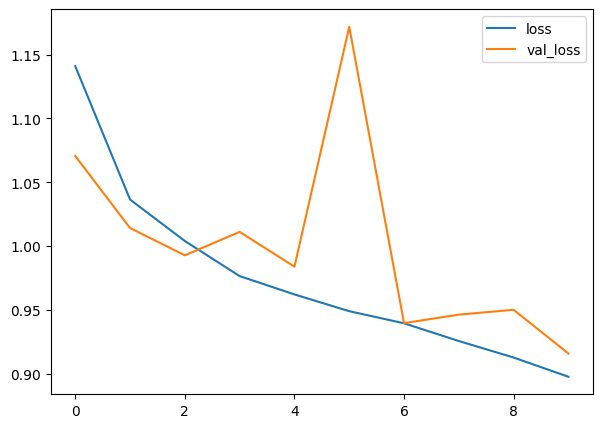

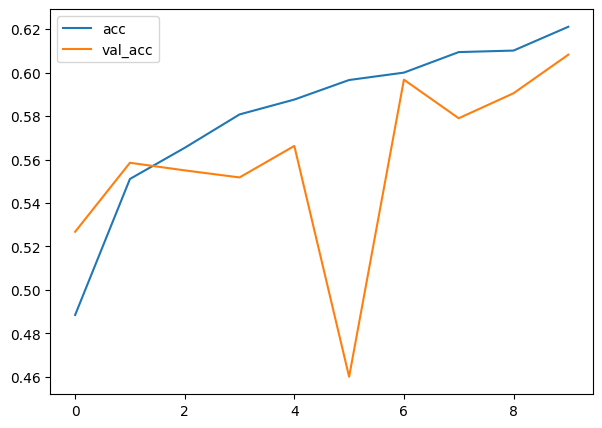

In [ ]:
loss_val_vgg16 = pd.DataFrame(vgg16_history.history)
loss_val_vgg16[['loss', 'val_loss']].plot(figsize=(14/2, 5))
loss_val_vgg16[['acc', 'val_acc']].plot(figsize=(14/2, 5))

**Model** |  **Parameters**  |   **Val_Acc**

---

Basic CNN | adam,scc  | 74.12%

ResNet50 | SGD, lr=0.01 | 84.15%

VGG16  |  adam,scc | 60.83%

From above results we can clearly see that ResNet50 with lr=0.01 gives best result.

So we will tune this model by trying different learning rates and optimisers

## ResNet50 with different Learning Rates

In [17]:
y=[]
x=[0.008,0.03,0.05,0.07,0.09]

In [18]:
for l in x:
  ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3), classes=4)
  for layers in ResNet50_model.layers:
      layers.trainable=True

  opt = SGD(lr=l,momentum=0.7)
  resnet50_x = Flatten()(ResNet50_model.output)
  resnet50_x = Dense(128,activation='relu')(resnet50_x)
  resnet50_x = Dense(4,activation='softmax')(resnet50_x)
  resnet50_x_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_x)
  resnet50_x_final_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= opt, metrics=['acc'])

  number_of_epochs = 10
  resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
  resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
  callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
  resnet50_history = resnet50_x_final_model.fit(train_dataset, epochs = number_of_epochs ,validation_data = validation_dataset,callbacks=callbacklist,verbose=1)
  his_ = pd.DataFrame(resnet50_history.history)
  y.append(his_['val_acc'][9])

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.8493 - acc: 0.6592
Epoch 1: val_acc improved from -inf to 0.29875, saving model to resnet50-saved-model-01-val_acc-0.30.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 152s 221ms/step - loss: 0.8493 - acc: 0.6592 - val_loss: 1.3430 - val_acc: 0.2988 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5585 - acc: 0.7886
Epoch 2: val_acc improved from 0.29875 to 0.76500, saving model to resnet50-saved-model-02-val_acc-0.76.hdf5
625/625 [==============================] - 131s 210ms/step - loss: 0.5585 - acc: 0.7886 - val_loss: 0.6040 - val_acc: 0.7650 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4734 - acc: 0.8215
Epoch 3: val_acc improved from 0.76500 to 0.77975, saving model to resnet50-saved-model-03-val_acc-0.78.hdf5
625/625 [==============================] - 133s 212ms/step - loss: 0.4734 - acc: 0.8215 - val_loss: 0.5568 - val_acc: 0.7797 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.4172 - acc: 0.8405
Epoch 4: val_acc improved from 0.77975 to 0.83025, saving model to resnet50-saved-model-04-val_

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.7970 - acc: 0.6793
Epoch 1: val_acc improved from -inf to 0.36225, saving model to resnet50-saved-model-01-val_acc-0.36.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 150s 217ms/step - loss: 0.7970 - acc: 0.6793 - val_loss: 1.3090 - val_acc: 0.3623 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5547 - acc: 0.7888
Epoch 2: val_acc improved from 0.36225 to 0.68050, saving model to resnet50-saved-model-02-val_acc-0.68.hdf5
625/625 [==============================] - 134s 214ms/step - loss: 0.5547 - acc: 0.7888 - val_loss: 0.8565 - val_acc: 0.6805 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4827 - acc: 0.8203
Epoch 3: val_acc improved from 0.68050 to 0.82300, saving model to resnet50-saved-model-03-val_acc-0.82.hdf5
625/625 [==============================] - 131s 210ms/step - loss: 0.4827 - acc: 0.8203 - val_loss: 0.4511 - val_acc: 0.8230 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.4187 - acc: 0.8440
Epoch 4: val_acc did not improve from 0.82300
625/625 [==============================] - 132s 2

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.8240 - acc: 0.6694
Epoch 1: val_acc improved from -inf to 0.35925, saving model to resnet50-saved-model-01-val_acc-0.36.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 149s 215ms/step - loss: 0.8240 - acc: 0.6694 - val_loss: 1.3236 - val_acc: 0.3593 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5519 - acc: 0.7906
Epoch 2: val_acc improved from 0.35925 to 0.81600, saving model to resnet50-saved-model-02-val_acc-0.82.hdf5
625/625 [==============================] - 135s 216ms/step - loss: 0.5519 - acc: 0.7906 - val_loss: 0.4808 - val_acc: 0.8160 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4684 - acc: 0.8218
Epoch 3: val_acc improved from 0.81600 to 0.82175, saving model to resnet50-saved-model-03-val_acc-0.82.hdf5
625/625 [==============================] - 139s 223ms/step - loss: 0.4684 - acc: 0.8218 - val_loss: 0.4617 - val_acc: 0.8217 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.4123 - acc: 0.8432
Epoch 4: val_acc did not improve from 0.82175
625/625 [==============================] - 137s 2

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.7937 - acc: 0.6873
Epoch 1: val_acc improved from -inf to 0.37050, saving model to resnet50-saved-model-01-val_acc-0.37.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 152s 221ms/step - loss: 0.7937 - acc: 0.6873 - val_loss: 1.3262 - val_acc: 0.3705 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5374 - acc: 0.7953
Epoch 2: val_acc improved from 0.37050 to 0.76250, saving model to resnet50-saved-model-02-val_acc-0.76.hdf5
625/625 [==============================] - 138s 221ms/step - loss: 0.5374 - acc: 0.7953 - val_loss: 0.6229 - val_acc: 0.7625 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4620 - acc: 0.8266
Epoch 3: val_acc improved from 0.76250 to 0.76750, saving model to resnet50-saved-model-03-val_acc-0.77.hdf5
625/625 [==============================] - 137s 219ms/step - loss: 0.4620 - acc: 0.8266 - val_loss: 0.6475 - val_acc: 0.7675 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.3984 - acc: 0.8500
Epoch 4: val_acc improved from 0.76750 to 0.81775, saving model to resnet50-saved-model-04-val_

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.8143 - acc: 0.6715
Epoch 1: val_acc improved from -inf to 0.28825, saving model to resnet50-saved-model-01-val_acc-0.29.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 152s 220ms/step - loss: 0.8143 - acc: 0.6715 - val_loss: 1.5935 - val_acc: 0.2882 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5454 - acc: 0.7940
Epoch 2: val_acc improved from 0.28825 to 0.69450, saving model to resnet50-saved-model-02-val_acc-0.69.hdf5
625/625 [==============================] - 137s 219ms/step - loss: 0.5454 - acc: 0.7940 - val_loss: 0.7525 - val_acc: 0.6945 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4764 - acc: 0.8214
Epoch 3: val_acc improved from 0.69450 to 0.80225, saving model to resnet50-saved-model-03-val_acc-0.80.hdf5
625/625 [==============================] - 142s 227ms/step - loss: 0.4764 - acc: 0.8214 - val_loss: 0.5026 - val_acc: 0.8023 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.4043 - acc: 0.8487
Epoch 4: val_acc did not improve from 0.80225
625/625 [==============================] - 140s 2

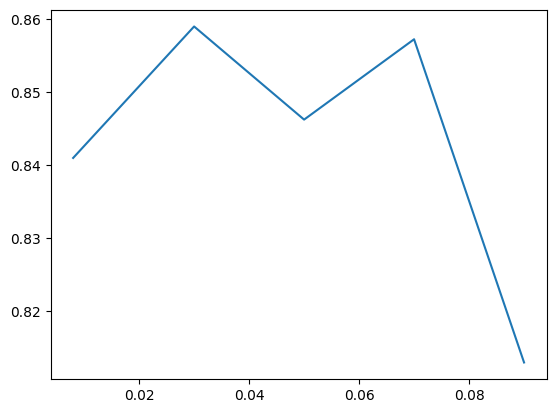

In [19]:
plt.plot(x , y)
plt.show()

In [21]:
print(x)
print(y)

[0.008, 0.03, 0.05, 0.07, 0.09]
[0.8410000205039978, 0.859000027179718, 0.8462499976158142, 0.8572499752044678, 0.8130000233650208]


## ResNet50 with Adam optimiser

In [20]:
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3), classes=4)

for layers in ResNet50_model.layers:
    layers.trainable=True

resnet50_x = Flatten()(ResNet50_model.output)
resnet50_x = Dense(128,activation='relu')(resnet50_x)
resnet50_x = Dense(4,activation='softmax')(resnet50_x)
resnet50_x_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_x)
resnet50_x_final_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

number_of_epochs = 10
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
resnet50_history = resnet50_x_final_model.fit(train_dataset, epochs = number_of_epochs ,validation_data = validation_dataset,callbacks=callbacklist,verbose=1)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.8855 - acc: 0.6518
Epoch 1: val_acc improved from -inf to 0.25450, saving model to resnet50-saved-model-01-val_acc-0.25.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 179s 226ms/step - loss: 0.8855 - acc: 0.6518 - val_loss: 1.4113 - val_acc: 0.2545 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.6892 - acc: 0.7280
Epoch 2: val_acc improved from 0.25450 to 0.78825, saving model to resnet50-saved-model-02-val_acc-0.79.hdf5
625/625 [==============================] - 146s 234ms/step - loss: 0.6892 - acc: 0.7280 - val_loss: 0.5955 - val_acc: 0.7883 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.6424 - acc: 0.7501
Epoch 3: val_acc did not improve from 0.78825
625/625 [==============================] - 138s 220ms/step - loss: 0.6424 - acc: 0.7501 - val_loss: 0.8935 - val_acc: 0.6660 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.7270 - acc: 0.7185
Epoch 4: val_acc did not improve from 0.78825
625/625 [==============================] - 136s 218ms/step - loss: 0.7270 - acc: 0.7185 - val_loss: 0.8342 - val

**Model** |  **Parameters**  |   **Val_Acc**

---

Basic CNN | adam,scc  | 74.12%

ResNet50 | SGD, lr=0.01 | 84.15%

VGG16  |  adam,scc | 60.83%

ResNet50 | SGD, lr=0.008 | 84.10

ResNet50 | SGD, lr=0.03 | 85.90

ResNet50 | SGD, lr=0.05 | 84.62

ResNet50 | SGD, lr=0.07 | 85.72

ResNet50 | SGD, lr=0.09 | 81.30

ResNet50 | adam, scc | 82.53


Hence the best model is **ResNet50** | SGD, **lr=0.03** with Validation Accuracy =  **85.90**

## Final Model ResNet50, lr=0.03

In [22]:
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3), classes=4)
for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.03,momentum=0.7)
resnet50_x = Flatten()(ResNet50_model.output)
resnet50_x = Dense(128,activation='relu')(resnet50_x)
resnet50_x = Dense(4,activation='softmax')(resnet50_x)
final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_x)
final_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = 10
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
resnet50_history = final_model.fit(train_dataset, epochs = number_of_epochs ,validation_data = validation_dataset,callbacks=callbacklist,verbose=1)


Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.8493 - acc: 0.6545
Epoch 1: val_acc improved from -inf to 0.30950, saving model to resnet50-saved-model-01-val_acc-0.31.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 171s 250ms/step - loss: 0.8493 - acc: 0.6545 - val_loss: 1.6670 - val_acc: 0.3095 - lr: 0.0100
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5497 - acc: 0.7958
Epoch 2: val_acc improved from 0.30950 to 0.71975, saving model to resnet50-saved-model-02-val_acc-0.72.hdf5
625/625 [==============================] - 152s 243ms/step - loss: 0.5497 - acc: 0.7958 - val_loss: 0.7090 - val_acc: 0.7197 - lr: 0.0100
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.4651 - acc: 0.8259
Epoch 3: val_acc improved from 0.71975 to 0.75850, saving model to resnet50-saved-model-03-val_acc-0.76.hdf5
625/625 [==============================] - 163s 260ms/step - loss: 0.4651 - acc: 0.8259 - val_loss: 0.6952 - val_acc: 0.7585 - lr: 0.0100
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.4183 - acc: 0.8438
Epoch 4: val_acc improved from 0.75850 to 0.80425, saving model to resnet50-saved-model-04-val_

## Prediction

In [23]:
y__= final_model.predict(test_dataset)

313/313 [==============================] - 46s 145ms/step


In [24]:
y__.shape

(10000, 4)

In [25]:
y1= np.zeros((10000,1))
for i in range(len(y__)):
  y1[i]= np.where(y__[i]==max(y__[i]))

<ipython-input-25-9cb201bc7976>:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y1[i]= np.where(y__[i]==max(y__[i]))


In [26]:
y2=[]
for i in range(10000):
  if y1[i] == 0:
    y2.append('CNV')
  elif y1[i] == 1:
    y2.append('DME')
  elif y1[i] == 2:
    y2.append('DRUSEN')
  elif y1[i] == 3:
    y2.append('NORMAL')


In [27]:
y__[0]

array([0.0090601 , 0.00555326, 0.10548181, 0.87990487], dtype=float32)

In [28]:
y1[0]

array([3.])

In [29]:
y2[0]

'NORMAL'

In [30]:
y_pred = pd.DataFrame(y2)

In [31]:
y_pred

,0
0,NORMAL
1,NORMAL
2,NORMAL
3,NORMAL
4,DME
...,...
9995,NORMAL
9996,NORMAL
9997,DME
9998,CNV


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(y_pred, *[0], **{})
chart

In [32]:
y_pred.to_csv('/content/drive/MyDrive/CS550Asss2/FinalOutput')